In [28]:
import numpy as np
import pandas as pd
from collections import defaultdict
from sklearn import metrics
import joblib
from sklearn.cluster import AgglomerativeClustering
from time import time
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage

In [16]:
X_lsa = joblib.load('../../dataset/preprocessed_clustering.joblib')

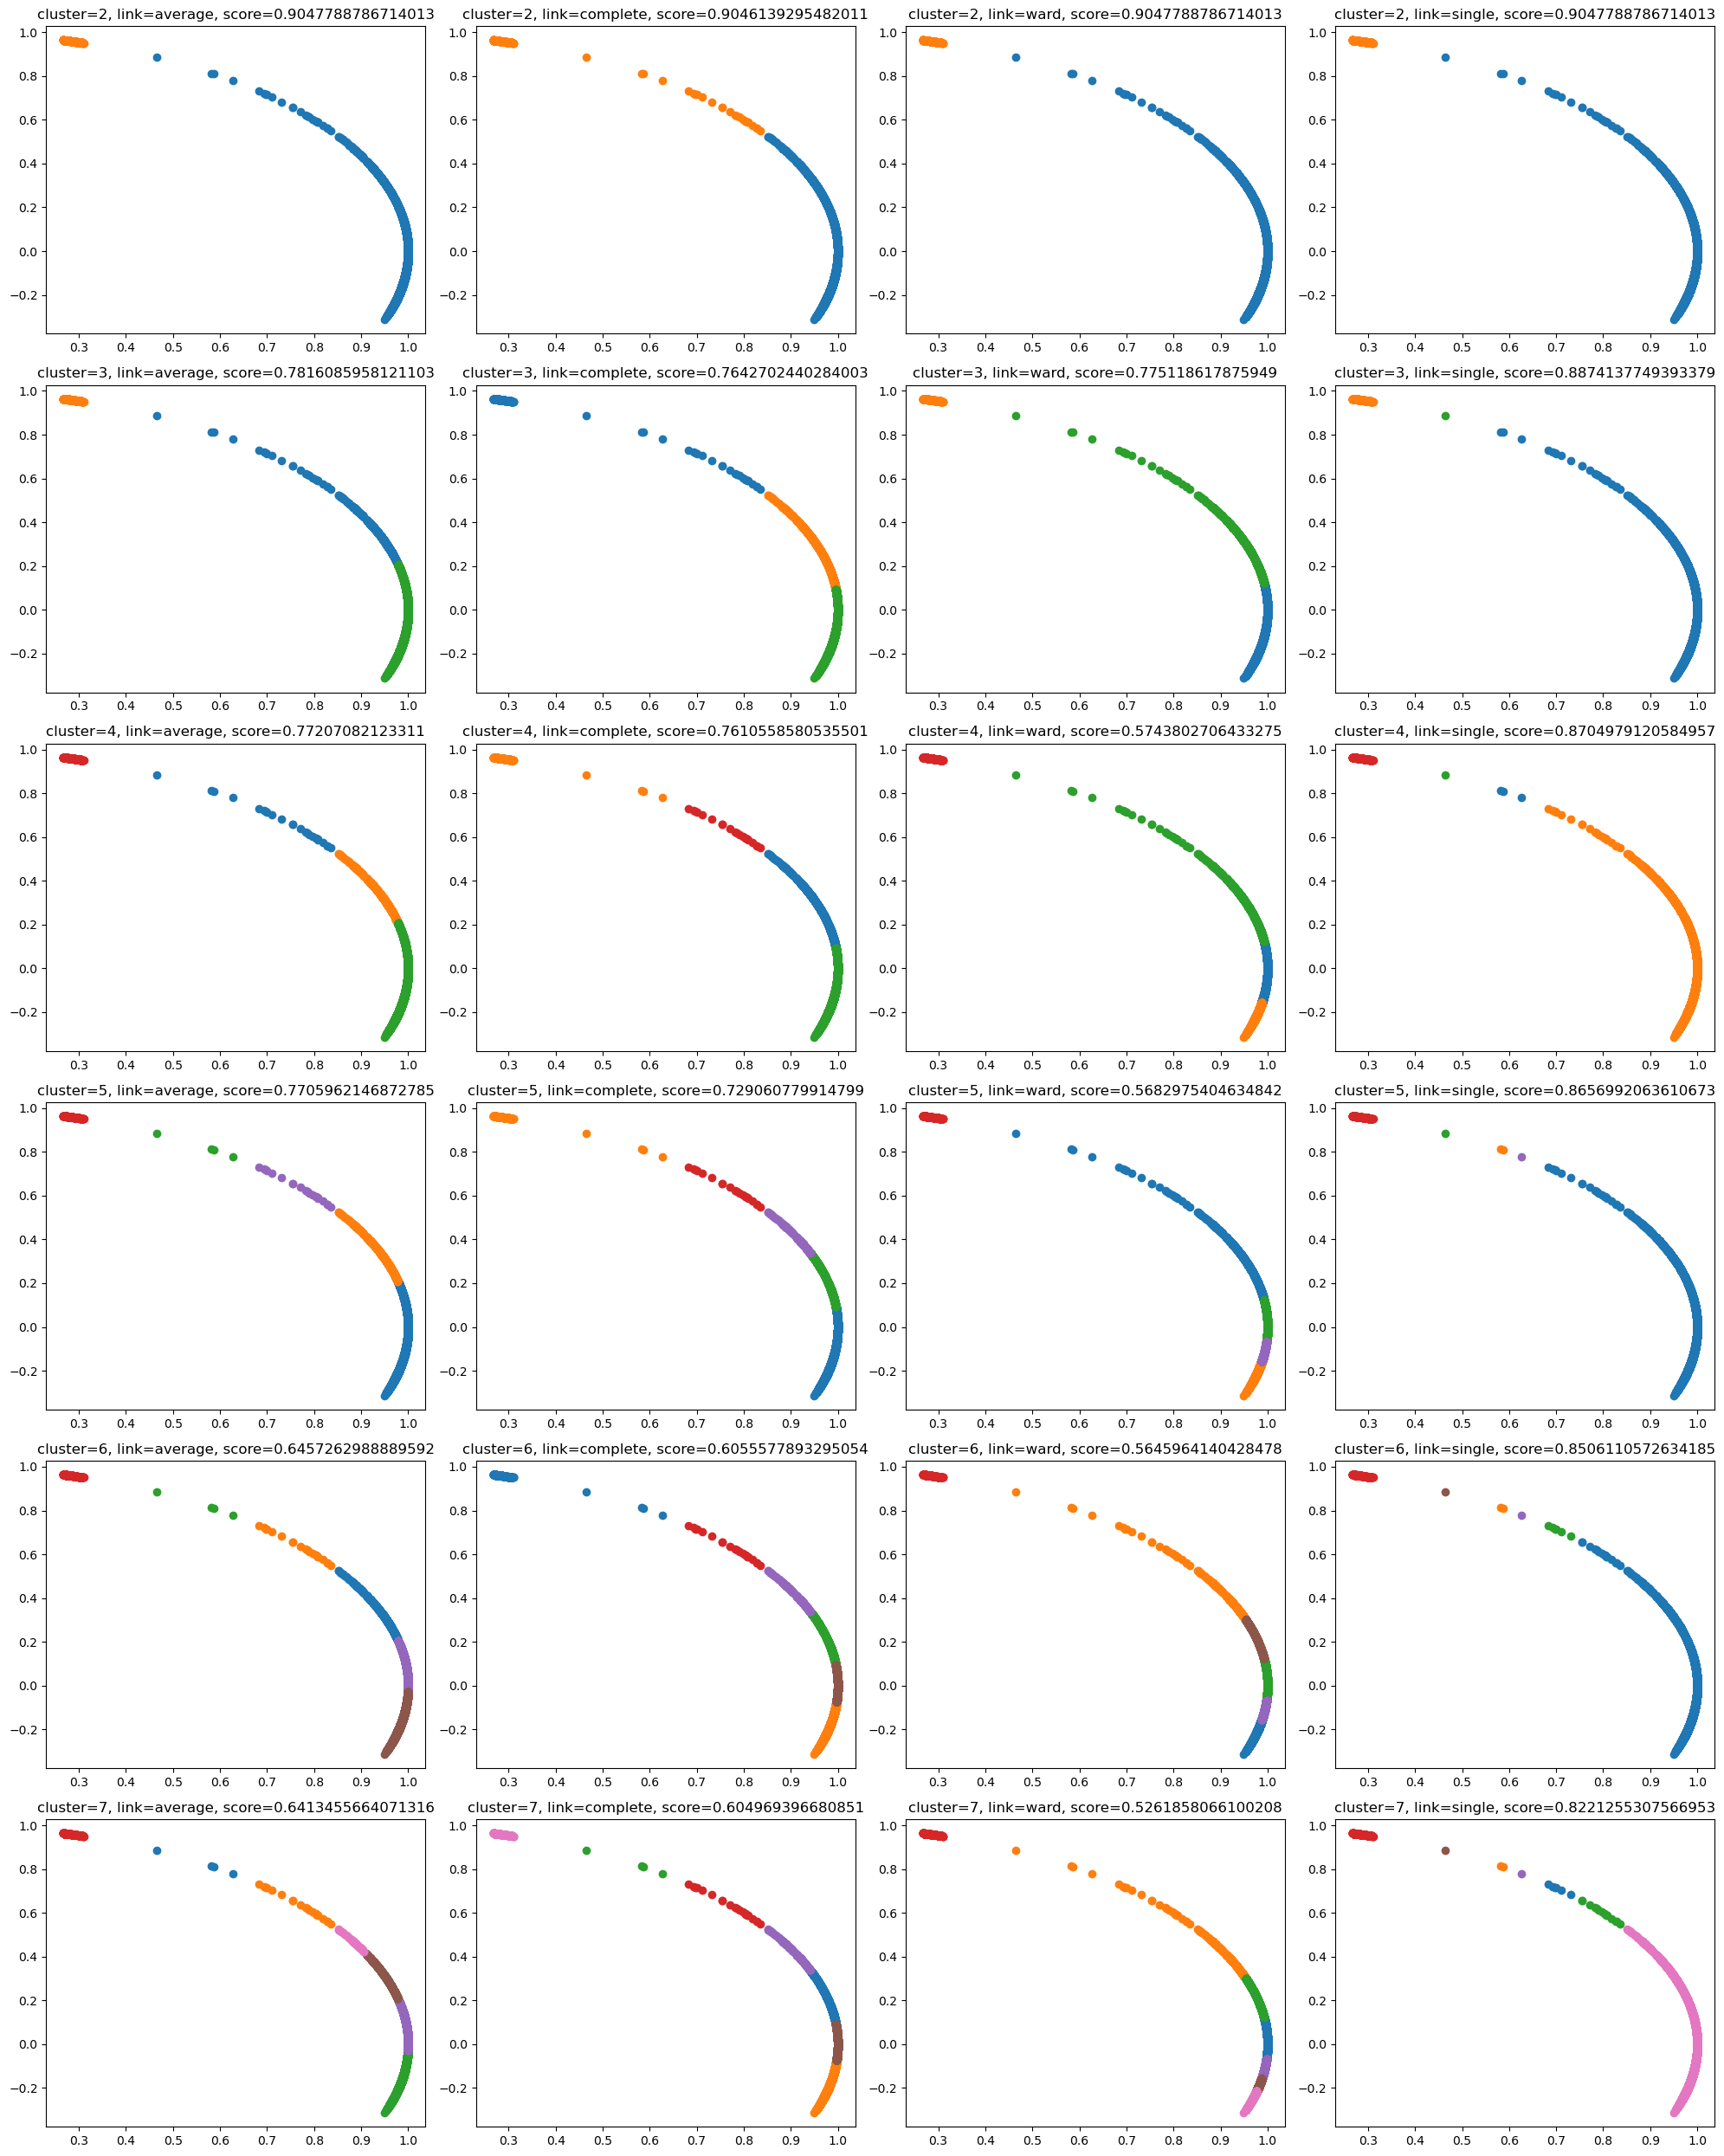

In [25]:
K = range(2,8)
linkages = ['complete', 'average', 'ward', 'single']

best_model = None
best_score = float('-inf')

fig, axes = plt.subplots(len(K), len(linkages), figsize=(20, 25))
for i, cluster_num in enumerate(K):
    for j, l in enumerate(linkages):
        kmeans = AgglomerativeClustering(n_clusters=cluster_num, linkage=l)
        kmeans.fit(X_lsa)
        score = silhouette_score(X_lsa, kmeans.labels_)
        
        ax = axes[i, j]
        
        for cluster_label in range(cluster_num):
            cluster = X_lsa[kmeans.labels_ == cluster_label]
            ax.scatter(cluster[:, 0], cluster[:, 1], label=f'cluster {cluster_label}')
            
        ax.set_title(f'cluster={cluster_num}, link={l}, score={score}')
          
        plt.title(f'cluster={cluster_num}, link={l}, score={score}')
        if score > best_score:
            best_score = score
            best_model = kmeans

plt.tight_layout()
plt.show()

In [22]:
print(f'Best kmeans (score, num of clusters, linkage): ({best_score:.3f}, {best_model.n_clusters_}, {best_model.linkage})')

Best model (score, num of clusters, linkage): (0.905, 2, average)


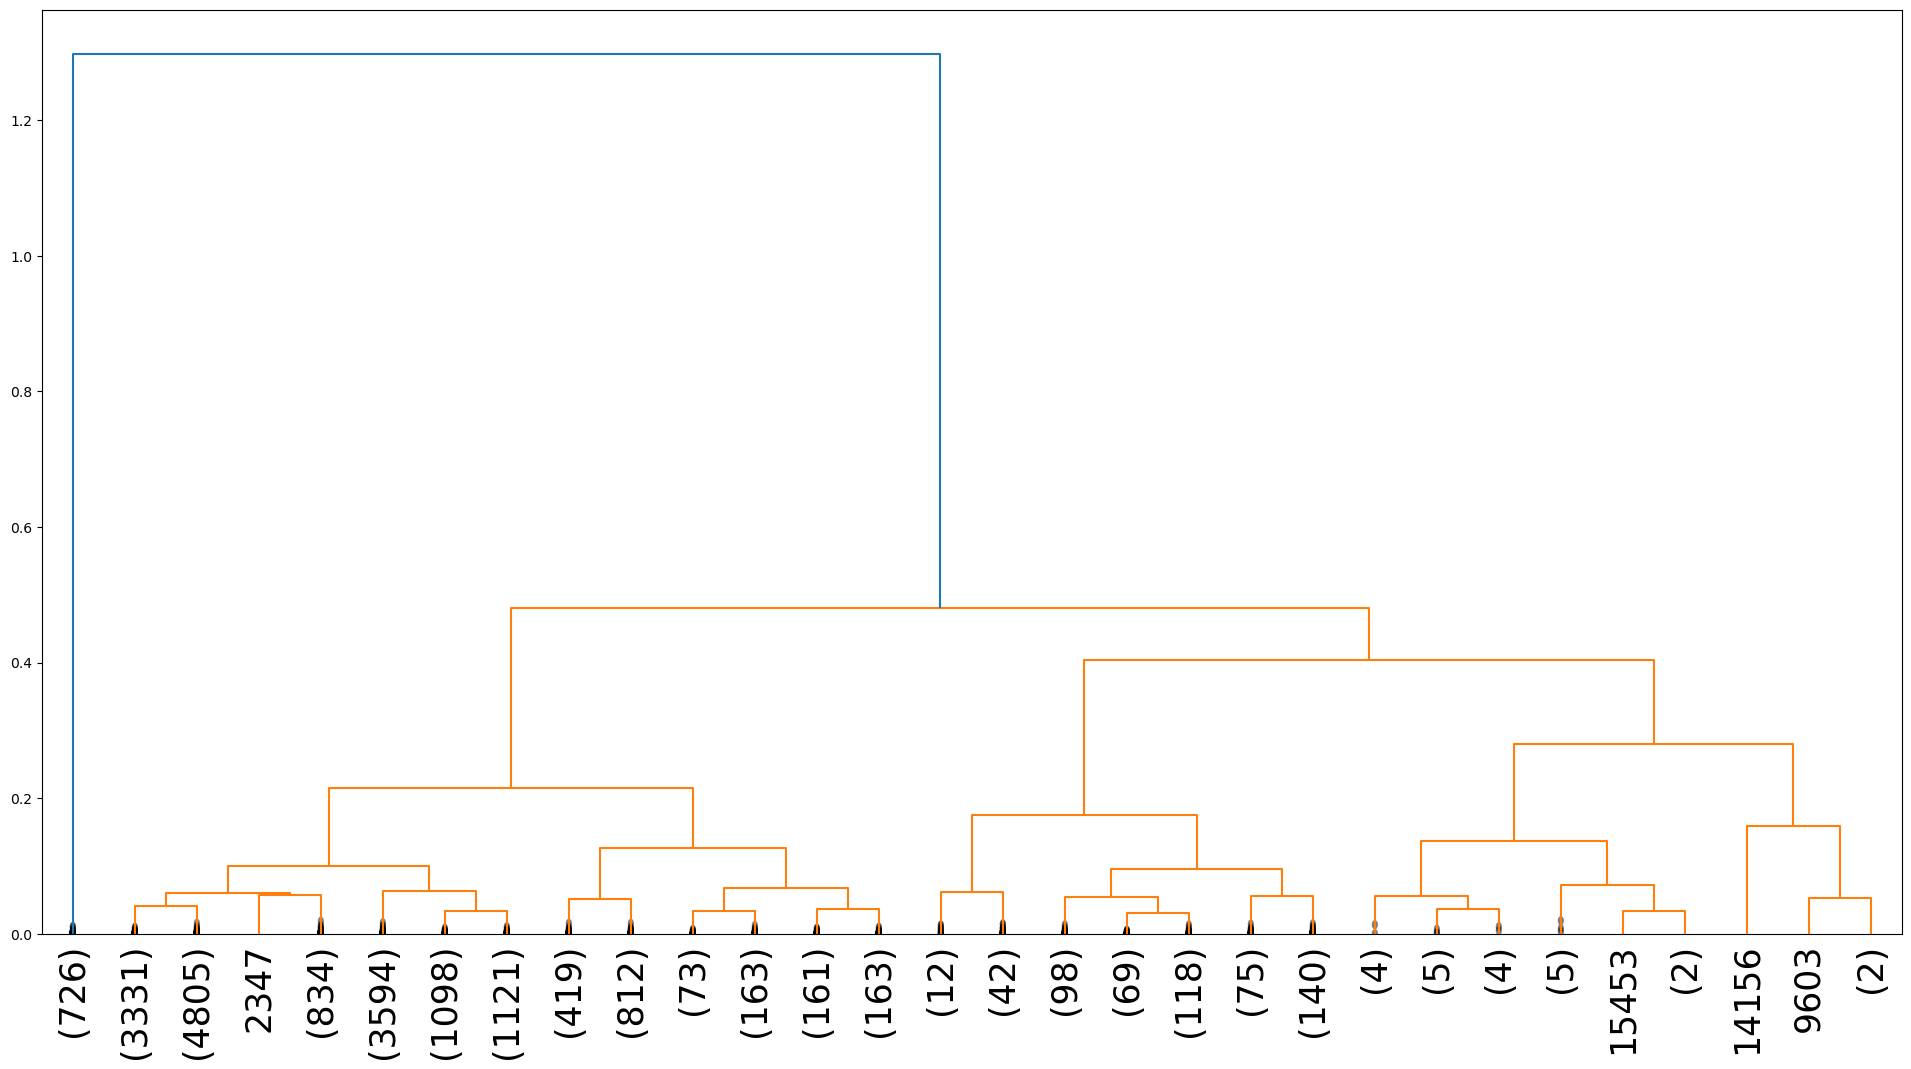

In [34]:
plt.figure(figsize=(24,12))

dendrogram(
    linkage(X_lsa, method=best_model.linkage),
    labels=[i for i in range(len(X_lsa))],
    truncate_mode='lastp',
    show_contracted=True, 
    leaf_rotation=90,
    leaf_font_size=25,
)

plt.show()